### Project Summary
- Your goal for this project is to predict is a passanger on the titinic would survive or not based on the features that were provided. 
- First use your knowledge of Analysis to explore the data and get sone insight on the passangers aboard the ship
- Clean the data to make sre the data is ready for the model, considering missing values

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
titanic  = pd.read_csv("resources/titanic_train.csv")

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Exploratory Analysis
- WE are missing a good bount of data from the cabin feature as well as the age of the passangers
- WE will take a deeper look in to replacing this data

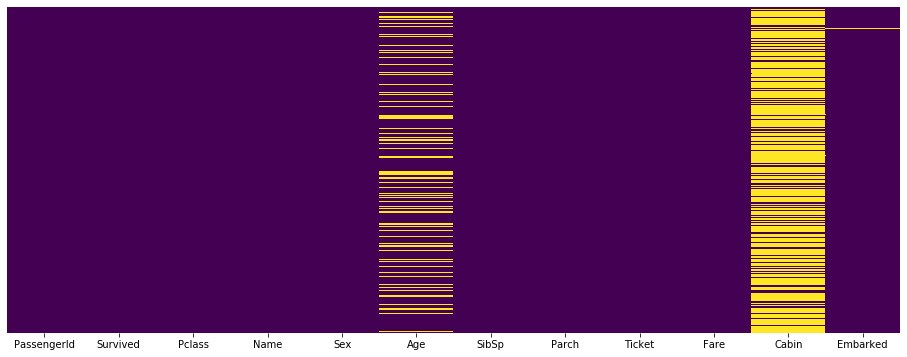

In [7]:
plt.figure(figsize=(16,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [9]:
sns.set_style("whitegrid")

### Looking at survival of passangers
- we will take a look at how many passanger survived vs did not survive

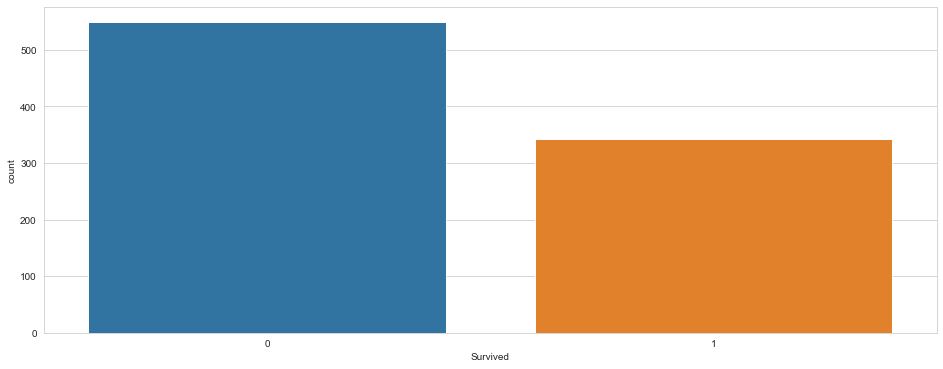

In [11]:
plt.figure(figsize=(16,6))
sns.countplot(titanic["Survived"], data=titanic)

### looking at the sex surrival rate

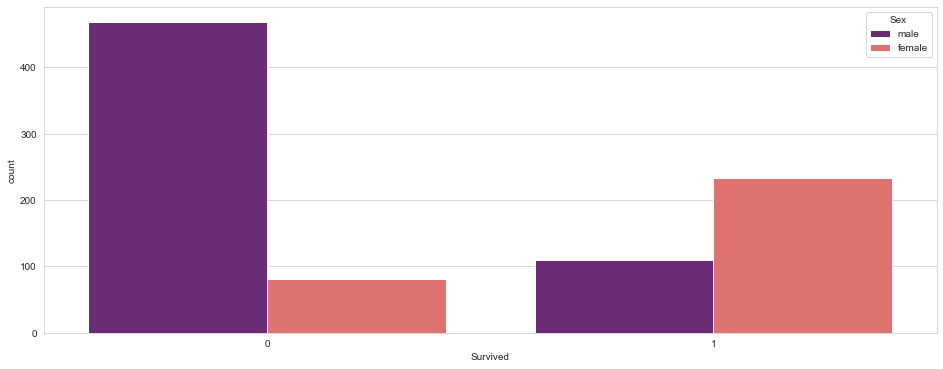

In [14]:
plt.figure(figsize=(16,6))
sns.countplot(titanic["Survived"], data=titanic, hue="Sex", palette="magma")

## Looking at the Class
 - more passangers survived in class 1
 - more passangers in class 3 did not survive

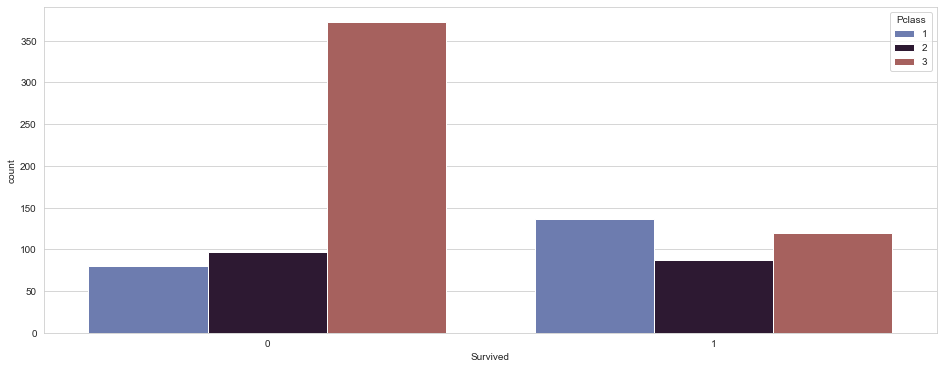

In [16]:
plt.figure(figsize=(16,6))
sns.countplot(titanic["Survived"], data=titanic, hue="Pclass", palette="twilight")

### Looking at age
- Average age was somewhere between 20 and 30 with a few oulier 70s and 80s

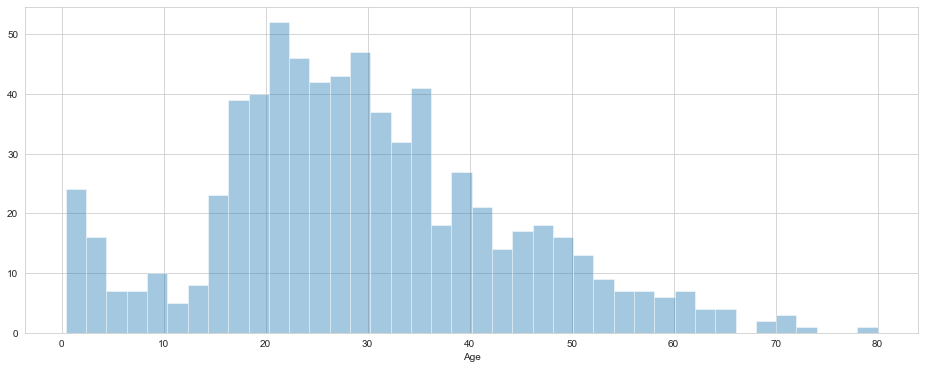

In [21]:
plt.figure(figsize=(16,6))
sns.distplot(titanic["Age"].dropna(), kde=False, bins = 40)

  ### Lookings at Siblings
  - More people on the ship had no siblings on board
  - There was a large family containing 5 to 8 members

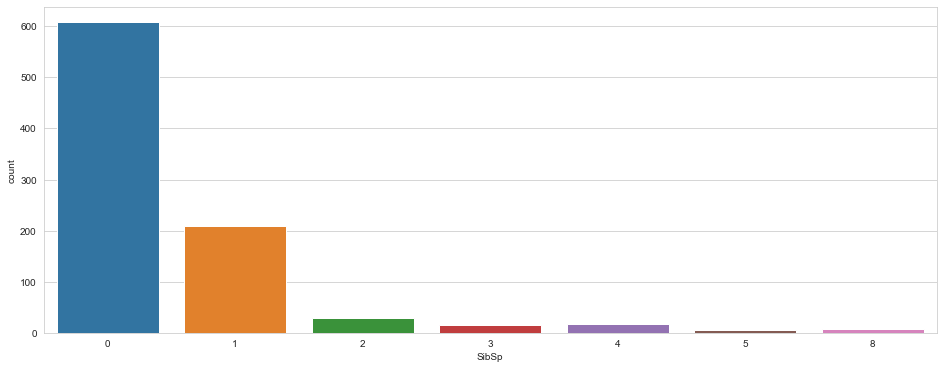

In [23]:
plt.figure(figsize=(16,6))
sns.countplot(titanic["SibSp"])

### Analyzing the fare
- Average fare is between 0 and 100 
- Appears that there was a fare of 500. We can assuming the family of 8 potentially

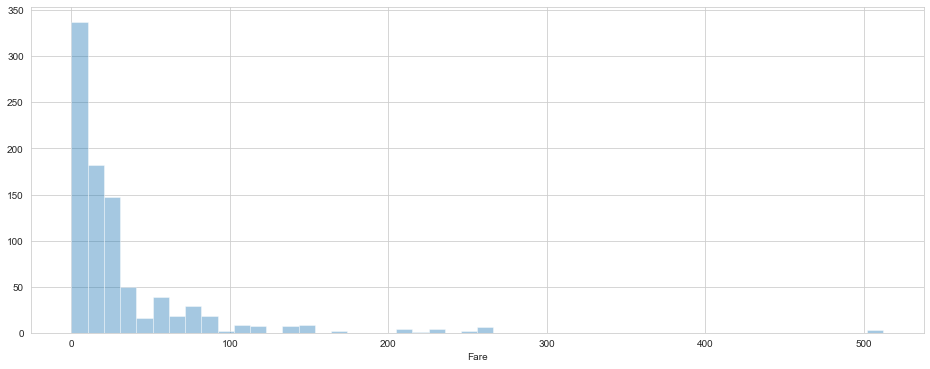

In [27]:
plt.figure(figsize=(16,6))
sns.distplot(titanic["Fare"], kde=False)

### Cleaning the data

In [28]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Handling mising data 
- Will consider the average age of a passager by pclass
- WE can use this to impute the missing data from the age feature

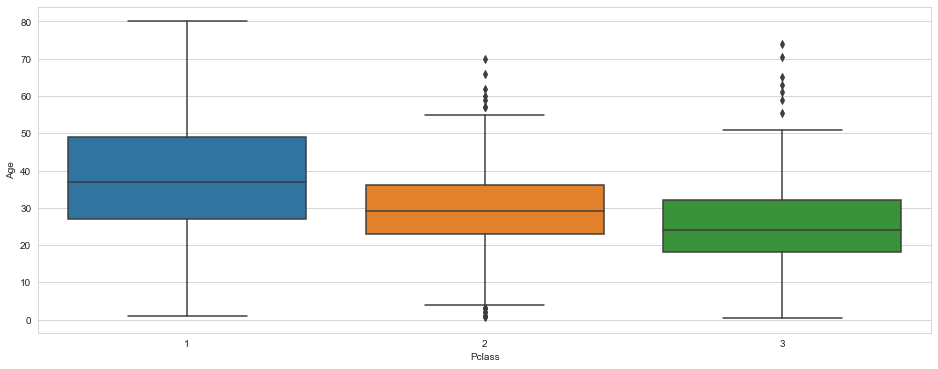

In [30]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "Pclass", y = "Age", data=titanic)

In [32]:
def setAge(cols):
    Age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(Age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [36]:
titanic["Age"] = titanic[["Age","Pclass"]].apply(setAge, axis = 1)

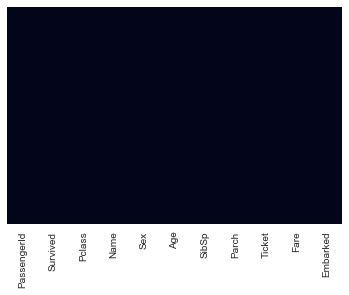

In [46]:
sns.heatmap(titanic.isnull(),yticklabels=False, cbar=False)

### Cabin Column
- Since there are too many missing columns in the cabin feature we will drop the column over all 

In [38]:
titanic.drop("Cabin", axis=1, inplace=True)

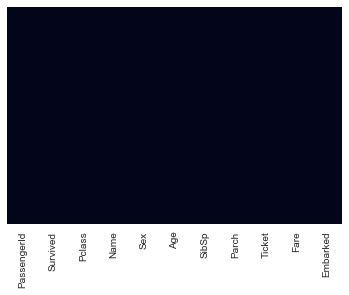

In [45]:
sns.heatmap(titanic.isnull(),yticklabels=False, cbar=False)

### Removing the on missing embarked value

In [41]:
titanic.dropna(inplace=True)

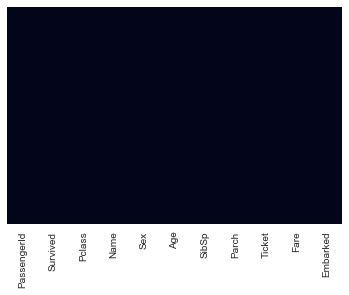

In [44]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

# Dealing with Categorical Features
- Will need to convert the categorical variables to dummy/one hot encoding so that our ML model could take in these values. We ill do this using pandas

In [47]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,29,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,37,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,37,0,0,111369,30.0000,C


### Sex Columns -Update with dummies
- Converting to indicatior vars
- dropping first column so we do not have a perfect predictor of the other column 

In [50]:
titanic["Sex"] = pd.get_dummies(titanic["Sex"], drop_first=True)

In [51]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,24,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,29,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,37,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,37,0,0,111369,30.0000,C


# Doing the same for the embarked Column

In [54]:
embarked = pd.get_dummies(titanic["Embarked"], drop_first=True)

In [55]:
titanic = pd.concat([titanic, embarked], axis=1)

In [57]:
titanic.drop("Embarked", inplace=True, axis=1)

In [58]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,24,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,37,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,24,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,37,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",1,24,0,0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,29,0,0,211536,13.0000,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,37,0,0,112053,30.0000,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24,1,2,W./C. 6607,23.4500,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,37,0,0,111369,30.0000,0,0


### Dropping columns we do not need

In [59]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Q', 'S'],
      dtype='object')

In [62]:
titanic.drop(["Name","Ticket",], axis=1, inplace=True)

## Overview
- This looks perfect for a ML Algorithim. We will drop the passanger ID

In [63]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,1,24,1,0,7.2500,0,1
1,2,1,1,0,37,1,0,71.2833,0,0
2,3,1,3,0,24,0,0,7.9250,0,1
3,4,1,1,0,37,1,0,53.1000,0,1
4,5,0,3,1,24,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,29,0,0,13.0000,0,1
887,888,1,1,0,37,0,0,30.0000,0,1
888,889,0,3,0,24,1,2,23.4500,0,1
889,890,1,1,1,37,0,0,30.0000,0,0


In [66]:
titanic.drop("PassengerId", axis=1, inplace=True)

In [67]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,24,1,0,7.2500,0,1
1,1,1,0,37,1,0,71.2833,0,0
2,1,3,0,24,0,0,7.9250,0,1
3,1,1,0,37,1,0,53.1000,0,1
4,0,3,1,24,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,29,0,0,13.0000,0,1
887,1,1,0,37,0,0,30.0000,0,1
888,0,3,0,24,1,2,23.4500,0,1
889,1,1,1,37,0,0,30.0000,0,0


 ## Preparing for Model

In [68]:
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

## Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Getting model

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression()

In [75]:
model.fit(X_train, y_train)

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
predictions = model.predict(X_test)

### Metrics

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [82]:
print(confusion_matrix(y_test, predictions))

[[150  13]
 [ 36  68]]


### Predciton on random data
- will use random index from our titanic data

In [91]:
from random import randint
random_index = randint(1, len(titanic))
random_passanger = titanic.drop("Survived", axis=1).iloc[random_index]

### Working With random passanger
- Will need to pass the same shape that model is trained on

In [92]:
X_train.shape

(622, 8)

In [93]:
random_passanger.values.reshape(1,8)

array([[ 3.    ,  1.    , 24.    ,  4.    ,  1.    , 39.6875,  0.    ,
         1.    ]])

In [94]:
passanger = random_passanger.values.reshape(1,8)

In [95]:
model.predict(passanger)

array([0])

### True Value

In [96]:
titanic.iloc[random_index]["Survived"]

0.0